<a href="https://colab.research.google.com/github/rishikaa1/cognifyz_technologies/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 4: Location-based Analysis
Objective: Perform a geographical analysis of the restaurants in the dataset.

#Importing the libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Loading the dataset

In [92]:
dataset = pd.read_csv('Dataset .csv')

#Location-based Analysis

Location of Restaurants per latitude and longtitude

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


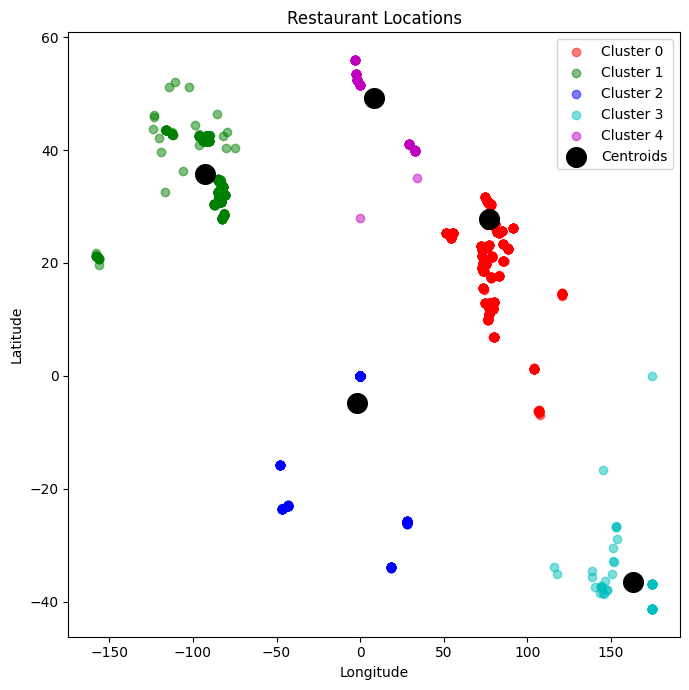

In [93]:
X = dataset[['Latitude', 'Longitude']]
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(X)
dataset['Cluster'] = cluster_labels
colors = ['r', 'g', 'b', 'c', 'm']

fig, ax = plt.subplots(figsize=(7, 7))

for cluster_num in range(k):
    cluster_data = dataset[dataset['Cluster'] == cluster_num]
    ax.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                c=colors[cluster_num], label=f'Cluster {cluster_num}', alpha=0.5)

ax.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0],
            s=200, c='black', label='Centroids')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Restaurant Locations')
ax.legend()
plt.tight_layout()
plt.show()

Restaurant Count by City

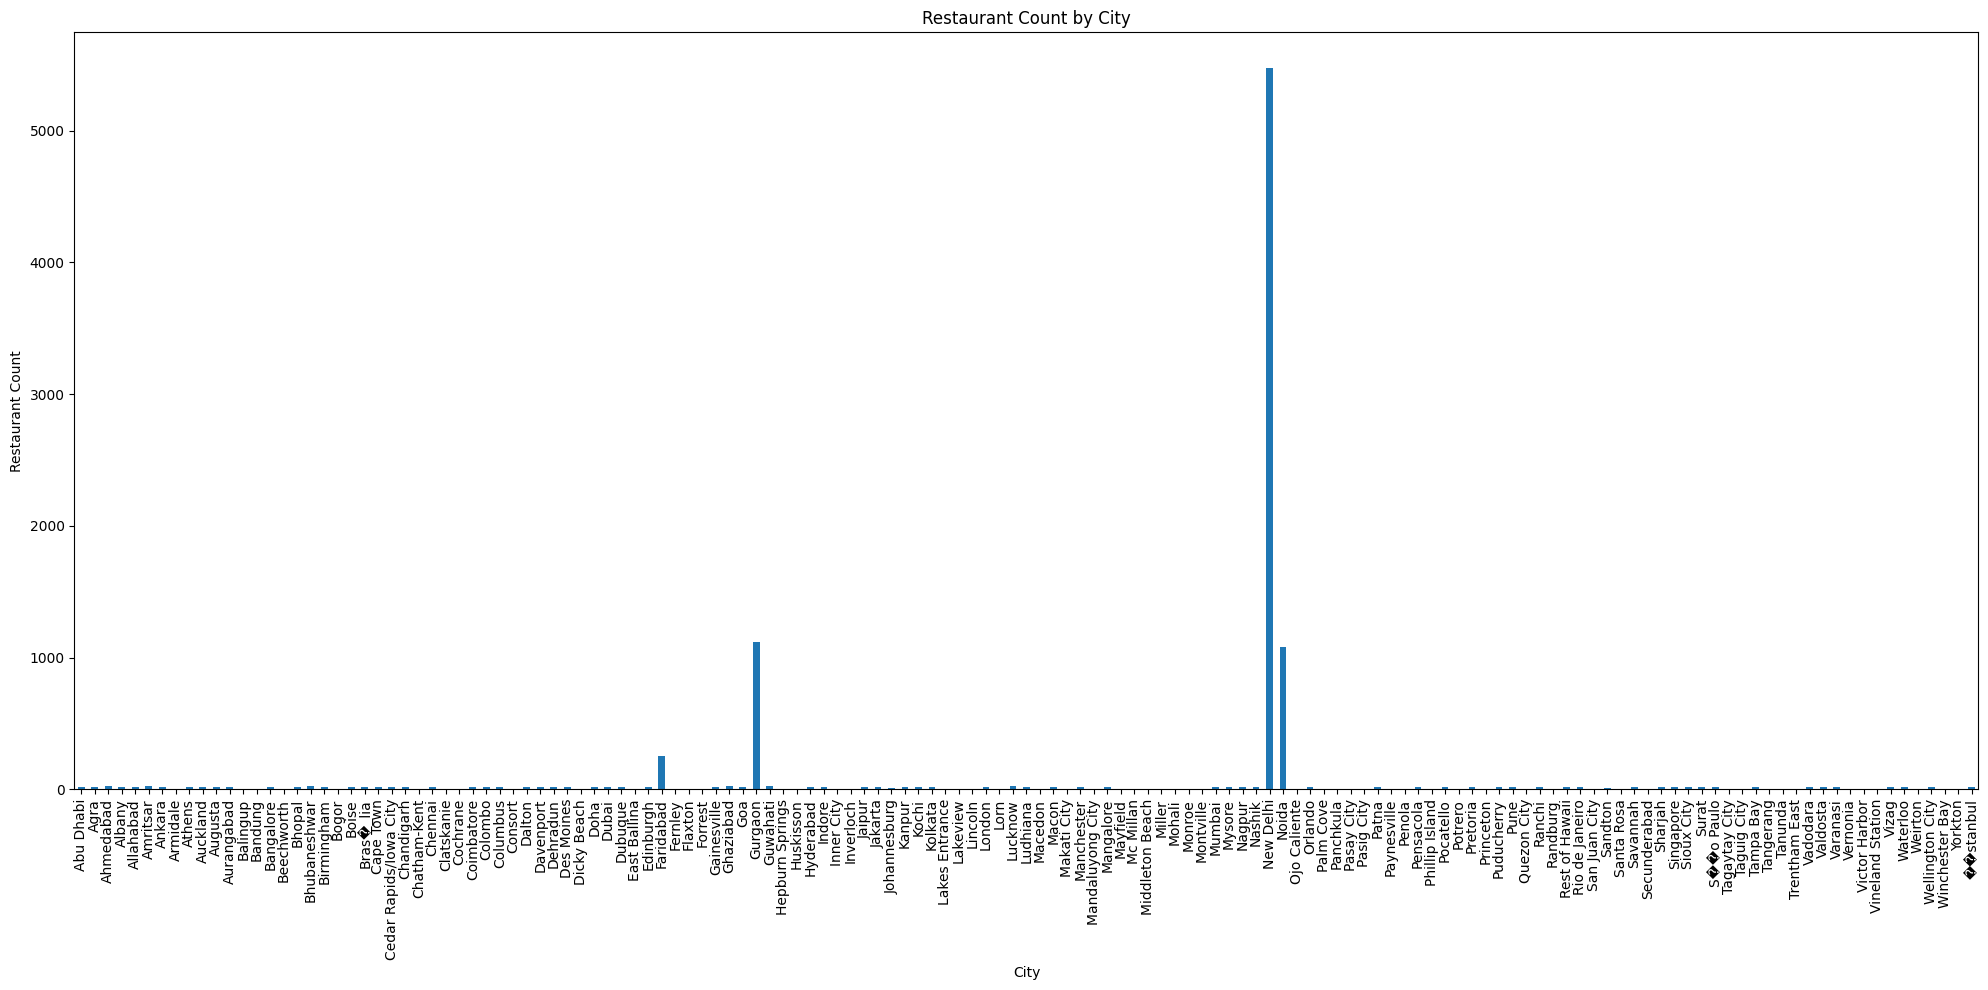

In [94]:
plt.figure(figsize=(20,10))
restaurant_count = dataset.groupby('City')['Restaurant Name'].count().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Restaurant Count')
plt.title('Restaurant Count by City')
plt.tight_layout()
plt.show()

Aggregate rating by City

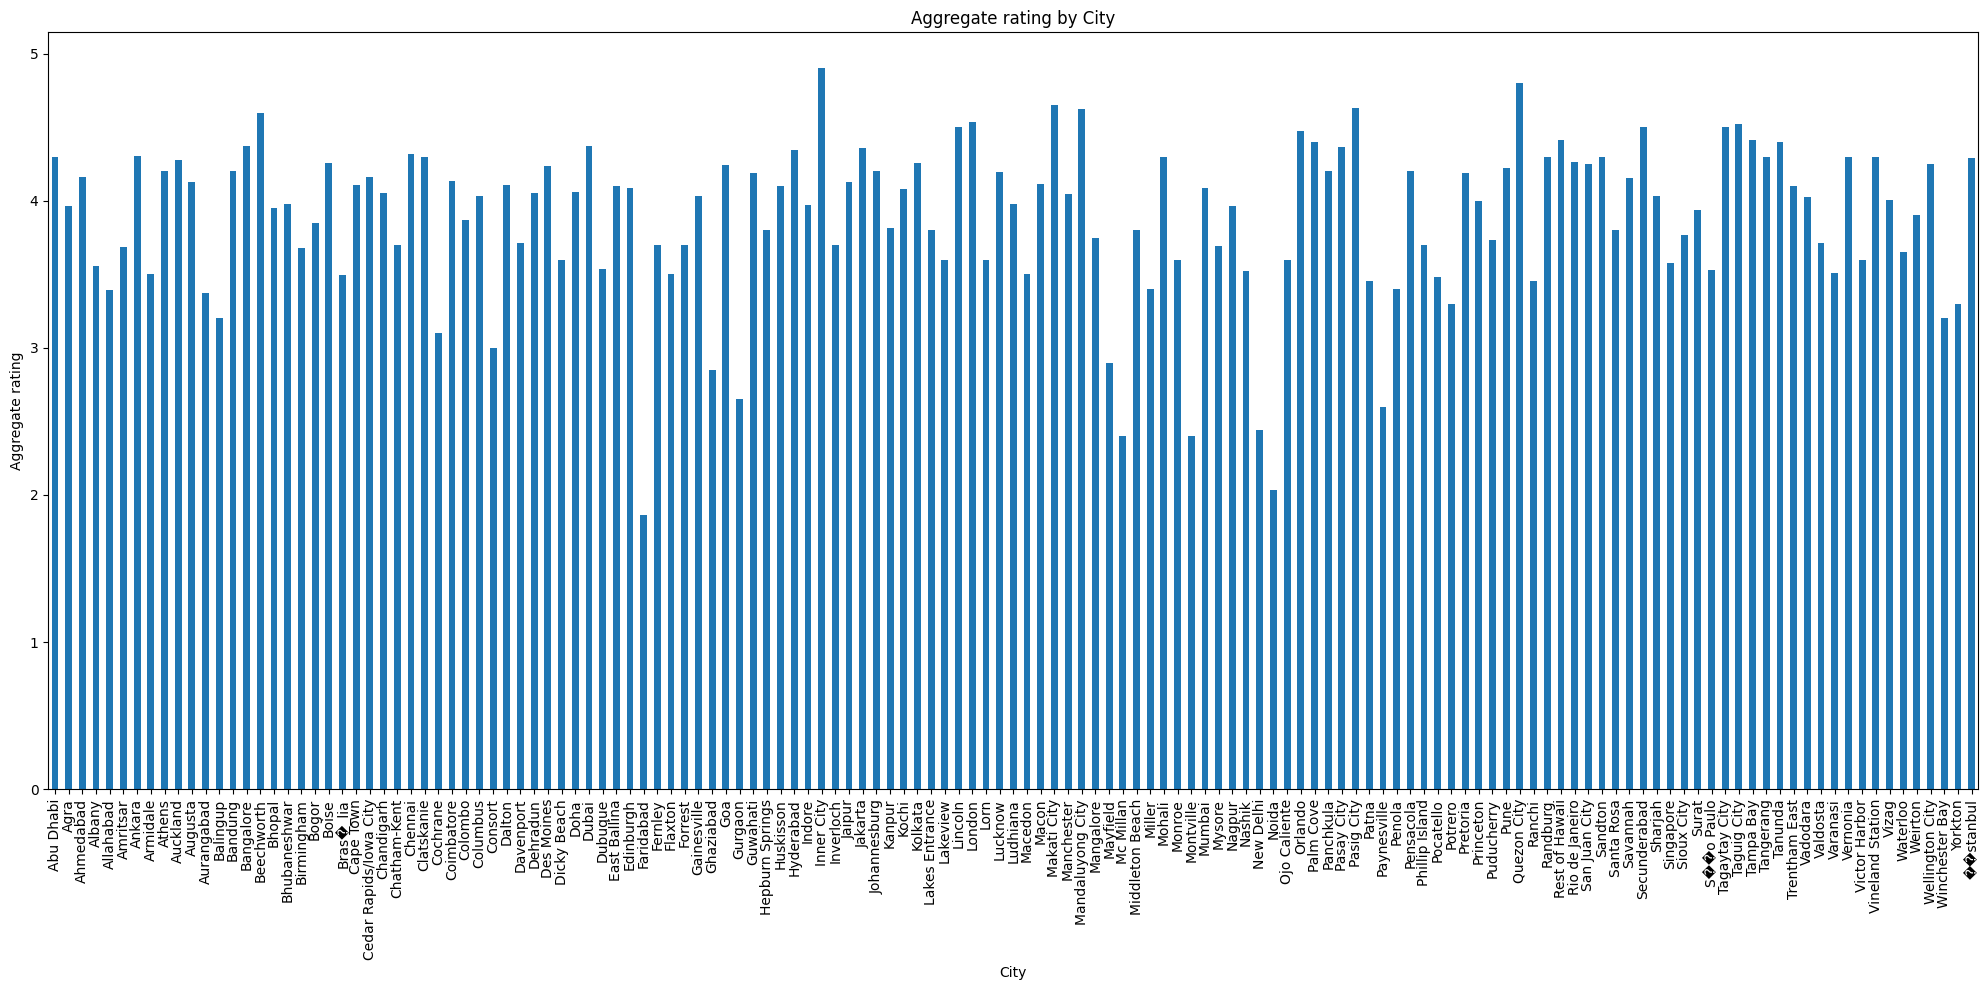

In [95]:
plt.figure(figsize=(20,10))
aggregate_ratings = dataset.groupby('City')['Aggregate rating'].mean().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Aggregate rating')
plt.title('Aggregate rating by City')
plt.tight_layout()
plt.show()

Number of Distinct Cuisines by City

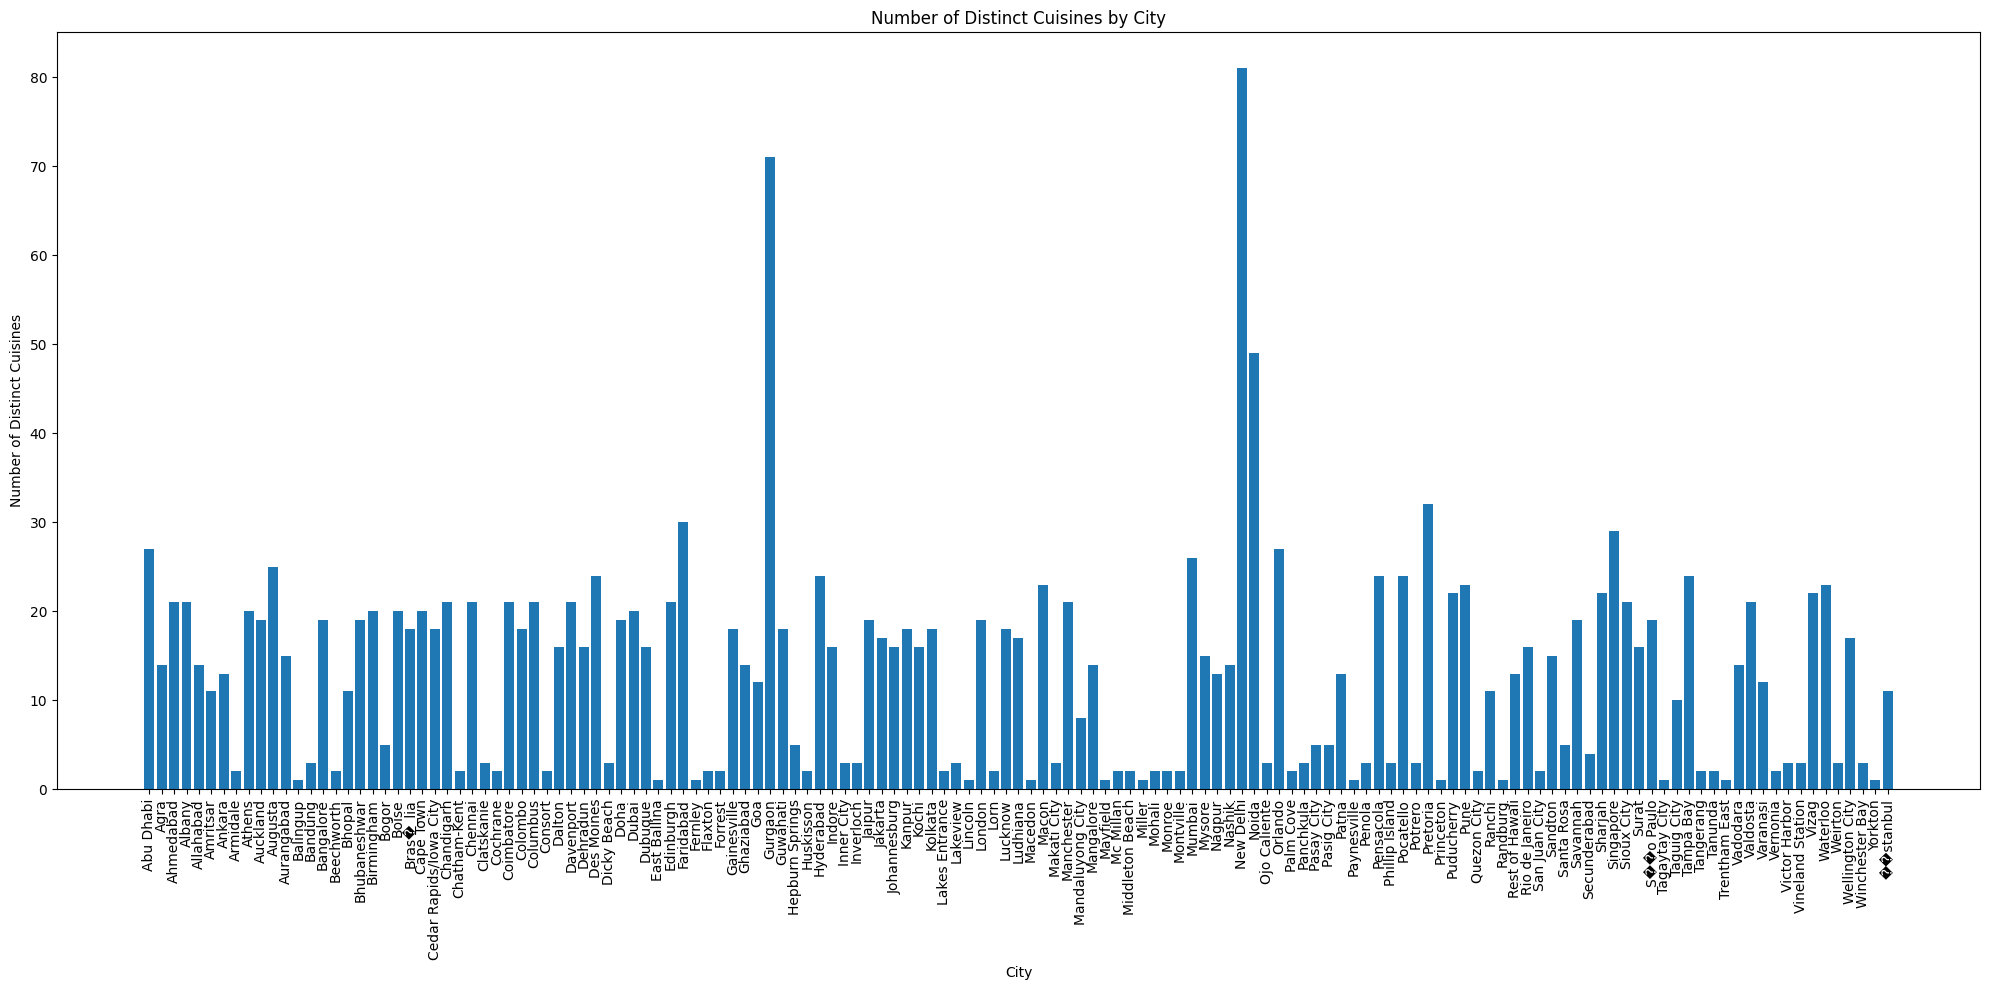

In [96]:
cuisine_counts = dataset.groupby('City')['Cuisines'].apply(lambda x: len(set(x.astype(str).str.split(', ').explode())))

# Create a bar chart
plt.figure(figsize=(20,10))
plt.bar(cuisine_counts.index, cuisine_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Distinct Cuisines')
plt.title('Number of Distinct Cuisines by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

List of unique cuisines per city

In [97]:
cuisines_per_city = dataset.groupby('City')['Cuisines'].unique()
print(cuisines_per_city)

City
Abu Dhabi          [American, Italian, Pizza, Turkish, Arabian, M...
Agra               [North Indian, Mughlai, North Indian, Rajastha...
Ahmedabad          [Chinese, Italian, North Indian, Mexican, Medi...
Albany             [BBQ, Burger, Seafood, American, BBQ, nan, Mex...
Allahabad          [North Indian, South Indian, Fast Food, Cafe, ...
                                         ...                        
Weirton                                    [Burger, Greek, Sandwich]
Wellington City    [Cafe, Kiwi, American, Fast Food, Italian, Caf...
Winchester Bay                              [Burger, Seafood, Steak]
Yorkton                                                      [Asian]
��stanbul          [Desserts, Cafe, Restaurant Cafe, Desserts, Ba...
Name: Cuisines, Length: 141, dtype: object


Common Price Range by City

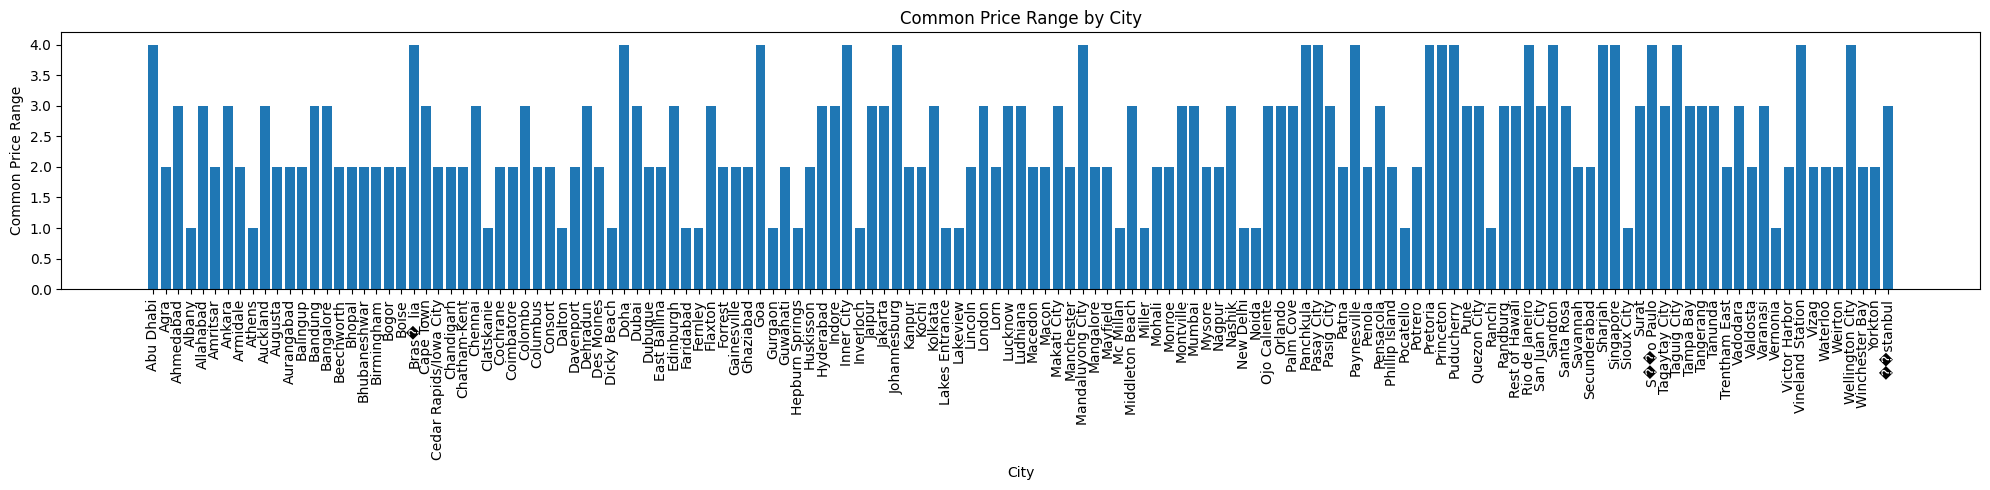

In [98]:
common_price_range_by_city = dataset.groupby('City')['Price range'].agg(lambda x: x.mode().iloc[0])
plt.figure(figsize=(20, 5))
plt.bar(common_price_range_by_city.index, common_price_range_by_city.values)
plt.xlabel('City')
plt.ylabel('Common Price Range')
plt.title('Common Price Range by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Conclusion
A geographical analysis of the restaurants has been performed.